## Team Member Names: Madeline Witters {-}

## Project Title: Predicting Customer Churn and Identifying Attributes of At-Risk Customers {-}

## Problem Statement {-}

One of the most important metrics of success in any business is customer retention. A business's customer churn rate can have very significant financial impacts that affect the company in a multitude of ways. A [Harvard Business Review article](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers) recently stated that merely increasing a company's customer retention rates by 5% can increase profits upwards of 25%; conversely, the cost of obtaining a new customer can be anywhere from 5 to 25 times as expensive as retaining an existing one. 

It therefore follows that if a company is able to predict which customers are at risk of leaving, they can use this information to better position themselves in a variety of ways, such as: creating an intervention plan for customers at risk of leaving, calculating potential loss of revenue in the next quarter, or simply better understanding their customer demographic and various market segments. 

In this project, there are two central research questions that I will aim to answer: 

1. Can I create a model that will predict customer churn with a reasonable accuracy rate? 
    + Furthermore, does one model type outperform another in predicting customer churn? 
2. What features/customer attributes (present in the dataset) are most important in predicting whether a customer will churn?
    + Additionally, what does interpretation of these attributes reveal (for example, are younger customers more at risk of churning)?

## Data Source {-}

For this project I am using the "Bank Customer Churn" dataset, sourced from Kaggle. The dataset has 10,000 data points and 12 variables. Each row represents an individual customer. Variables are both categorical and quantitative, and include demographic variables (age, gender, country), as well as industry-specific variables (balance, credit_card, etc.). The response variable "churn" is categorical, containing a 1 if the client left the bank and a 0 if they remained a customer. 

## Methodology {-}

My methodology for this project consisted of three distinct parts: 

+ Exploratory Data Analysis
+ Variable Selection
+ Modeling

I will begin with the exploratory data analysis.

**Exploratory Data Analysis**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.linear_model import LogisticRegressionCV
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

I began by performing some basic data cleaning. This primarily consisted of checking for any missing data, and dropping irrelevant features present in the dataset. There was no missing data in the dataset, so no imputation or row removal was necessary. There was only one irrelevant feature in the dataset, customer_id, a unique identification number for each customer. I used customer_id to confirm there were no duplicates present in the dataset, and then dropped it. 

In [2]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data['customer_id'].duplicated().any() #no duplicate customers

False

In [4]:
data = data.drop("customer_id", axis=1)
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [6]:
#info on why it's best to not do too much one-hot encoding for trees: 
#https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

#outlier removal (do before standardization): 
#https://medium.com/geekculture/essential-guide-to-handle-outliers-for-your-logistic-regression-model-63c97690a84d

In [7]:
null_check = data.isnull().any() #no missing data in the dataframe
null_check

credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

In [8]:
#data.min()

In [9]:
#data.max()

Next, I explored the remaining predictor variables via visual analysis. I began by creating boxplots for all the numeric variables. See below:

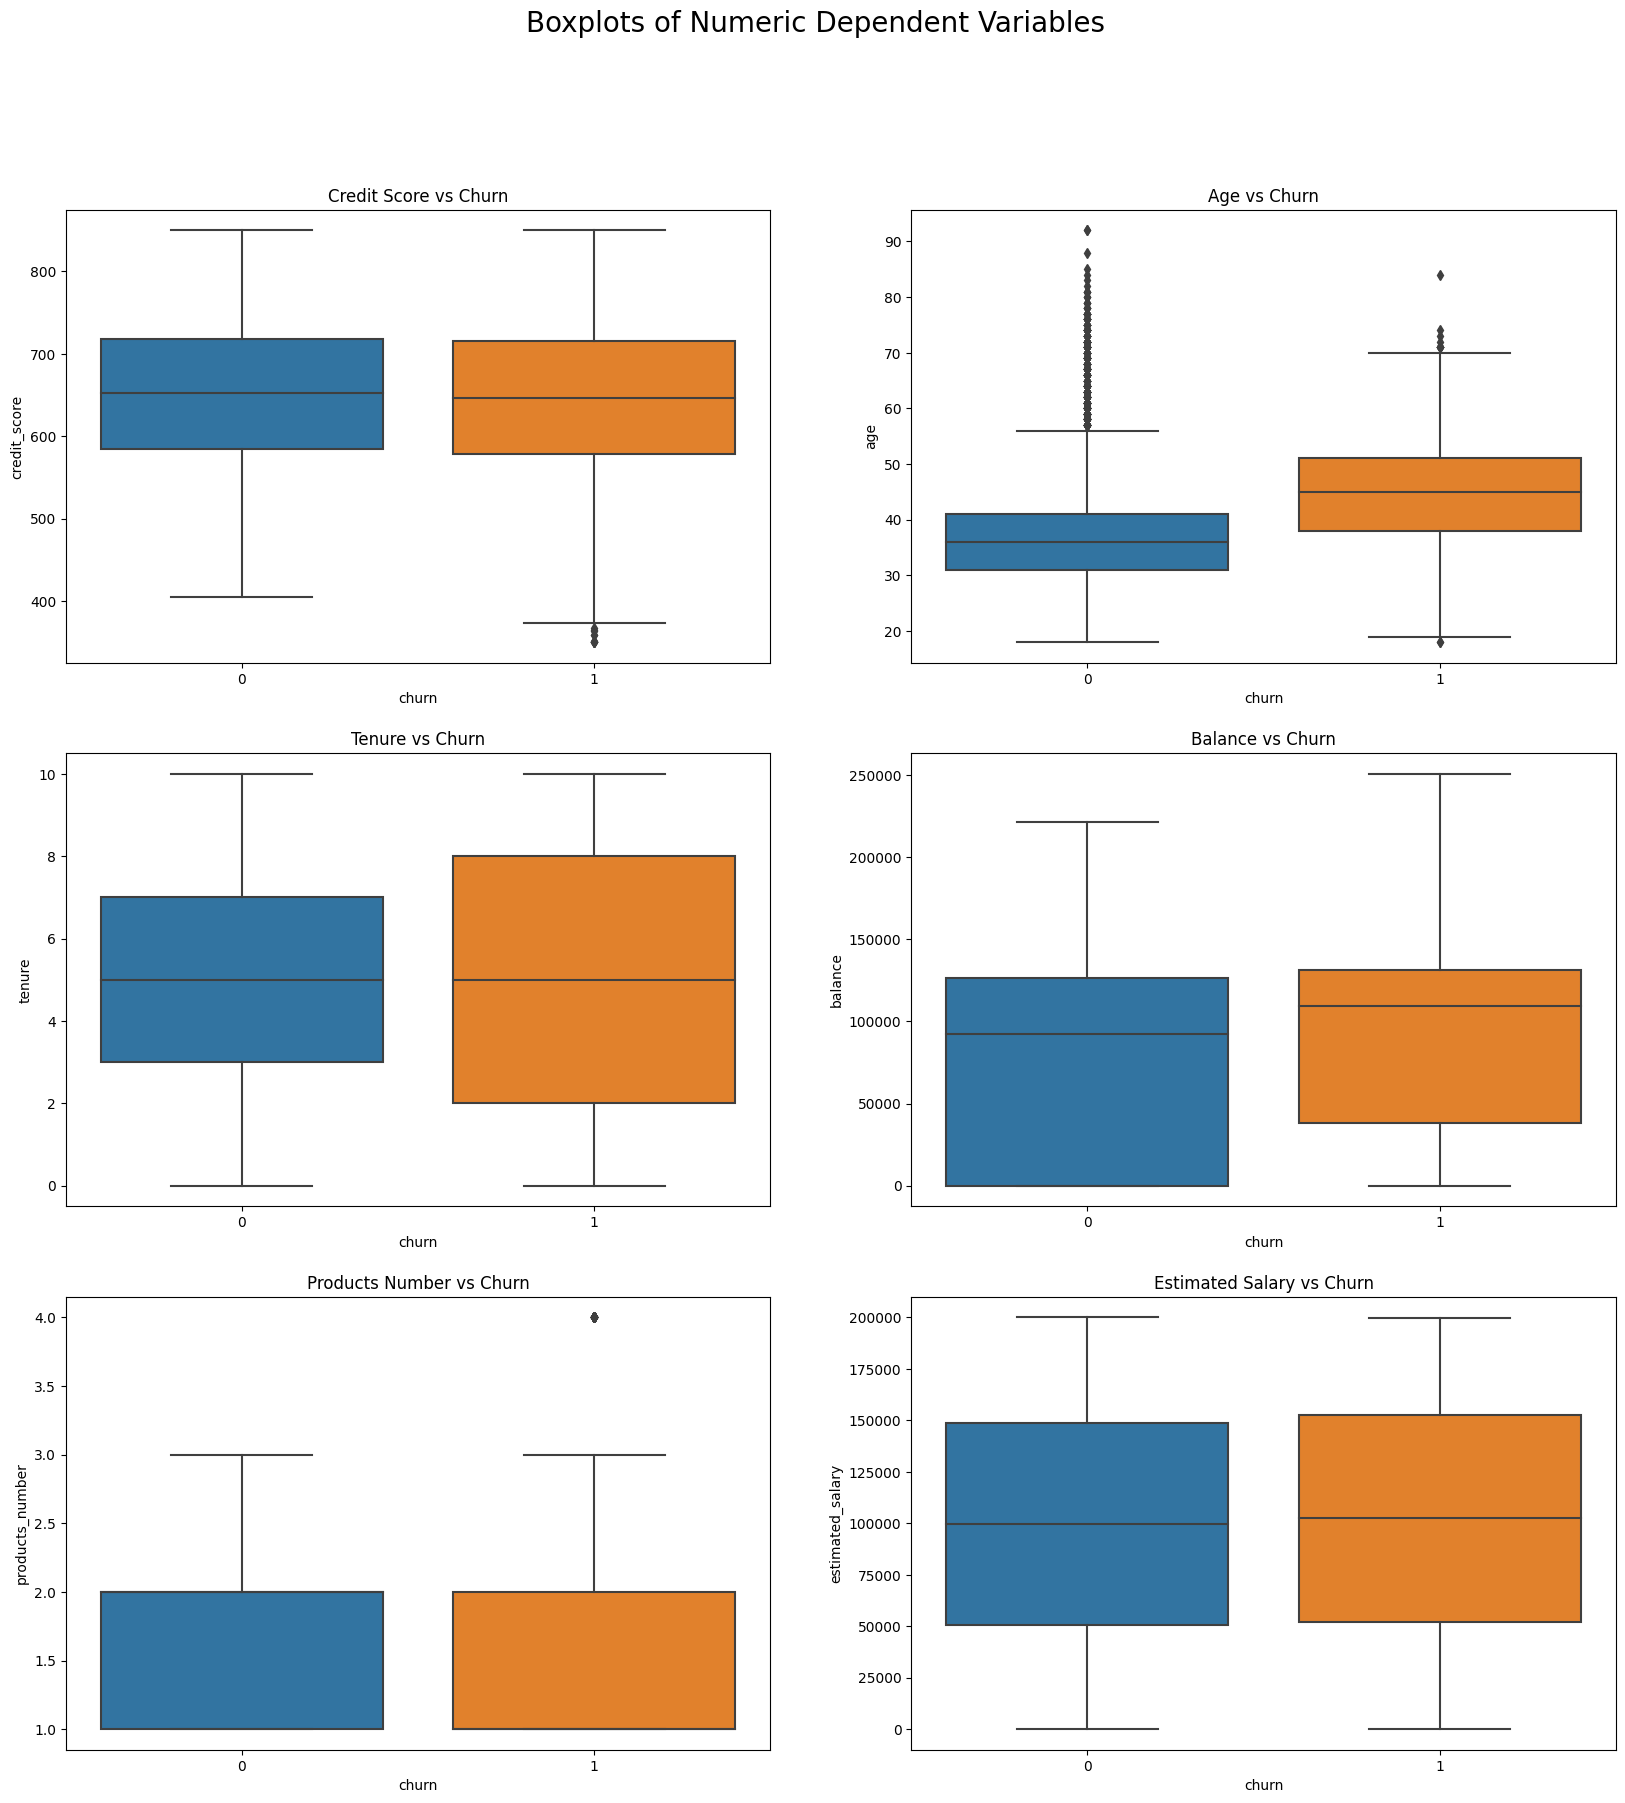

In [10]:
fig = plt.figure(figsize=(20,20))
fig.suptitle("Boxplots of Numeric Dependent Variables", fontsize=20) 

ax1 = plt.subplot(3,2,1)
sns.boxplot(x='churn', y='credit_score', data=data)

ax2 = plt.subplot(3,2,2)
sns.boxplot(x='churn', y='age', data=data)

ax3 = plt.subplot(3,2,3)
sns.boxplot(x='churn', y='tenure', data=data)

ax4 = plt.subplot(3,2,4)
sns.boxplot(x='churn', y='balance', data=data)

ax5 = plt.subplot(3,2,5)
sns.boxplot(x='churn', y='products_number', data=data)

ax6 = plt.subplot(3,2,6)
sns.boxplot(x='churn', y='estimated_salary', data=data)

ax1.title.set_text("Credit Score vs Churn")
ax2.title.set_text("Age vs Churn")
ax3.title.set_text("Tenure vs Churn")
ax4.title.set_text("Balance vs Churn")
ax5.title.set_text("Products Number vs Churn")
ax6.title.set_text("Estimated Salary vs Churn")

The boxplots revealed a couple interesting findings. First, it appears that the variables Credit Score, Products Number, and Estimated Salary all have very little impact on whether or not a customer churns. The boxplots for all of these variables were nearly identical when comparing the customer churn group (1) to the non-churn group (0). There was no visible distinction between the medians, and the inner-quartile range was nearly identical. Based off these boxplots alone, it would seem that these three variables will have little role in predicting churn.

Two variables that do appear to potentially have an impact, however, are Age and Balance. With the variable Age, it appears that older customers are more likely to churn, with the median for the churn group much higher than the non-churn group. With the variable Balance, it appears that those with a higher account balance are more likely to churn than those with a lower balance. 

There are a couple additional items of note present in these boxplots. First, when examining the Balance boxplot for the non-churn group, it appears that there is a very large group of customers who have an account balance of zero. This may be a sign of a skewed distribution of the Balance variable. Second, several of the boxplots appear to show potential outliers. This is particularly notable in the Age boxplots. I decided to further investigate these anomalies. 

I began by examining the distribution of the Balance variable via a histogram/KDE plot. See below:

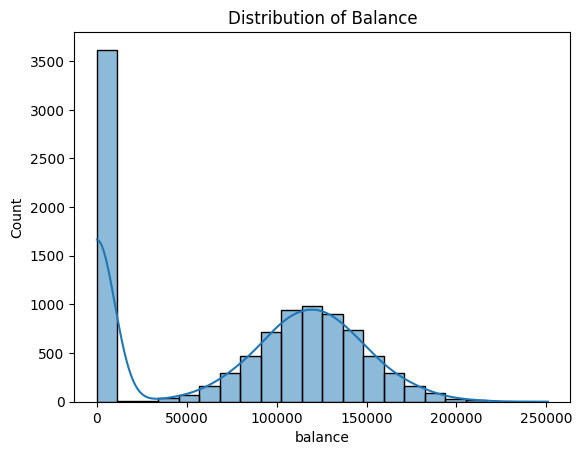

In [11]:
sns.histplot(data=data, x="balance", kde=True).set(title="Distribution of Balance")
plt.show()

The histogram for Balance indeed confirmed a skewed distribution, with over 3500 customers having a balance of 0 in their account. While this seems odd, it could be the case that anyone who opens a new account with the bank automatically enters the system with a balance of 0 before their money is transferred over (which could also explain the shape of the non-churn balance boxplot above--those who just opened an account would be less likely to churn). Still, due to the distribution of the Balance variable, I decided to transform it to a categorical variable called "zero_balance", with a 1 indicating the customer had a balance of $0, and a 0 indicating otherwise. 

Next, I used the z-score test to check for outliers present in the numeric dependent variables. Using a threshold of 3 standard deviations away from the mean, the z-score test identified approximately 133 outliers present in the Age variable, and 60 in the Products Number variable. No outliers were identified in any of the remaining variables. Having identified the outliers, I further investigated them in order to determine whether they should be removed from the dataset. 

Most notably, none of the outliers appeared to represent incorrect data or data entry errors. For example, in the Age category, if one of the outliers had been an individual with the age 300, that would be a clear result of an error and could be thrown out. However, the outliers in Age primarily consisted of individuals in their 80s and 90s, who, while they may considered outliers, nonetheless represent real customers. A histogram/KDE plot of the Age variable may be found below illustrating this distribution. Likewise, the outliers in the Products Number variable also did not appear to indicate any obvious errors. Instead, it was simply the case that most customers had 1-3 products, with a small minority having 4 products. 

Ultimately, I decided not to remove any of the outliers from the dataset due to the fact that all of the outliers contained real customer information and did not appear to be the result of errors. Still, it should be noted that these outliers could still impact model fit. I address this issue further in the Conclusion section when discussing ways to improve and extend this project. 

In [12]:
credit_score_zs = stats.zscore(data['credit_score'])

In [13]:
age_z = stats.zscore(data['age'])
#print(age_z)

In [14]:
ten_z = stats.zscore(data['tenure'])
#print(ten_z)

In [15]:
bal_z = stats.zscore(data['balance'])
#print(bal_z)

In [16]:
prod_z = stats.zscore(data['products_number'])
#print(prod_z)

In [17]:
sal_z = stats.zscore(data['estimated_salary'])
#print(sal_z)

In [18]:
threshold = 3
outlier = [] #write in report about how I conducted outlier analysis, and why I decided not to exclude any points
for z in sal_z: #further address how this could be modeled in the future (segment customers by age, products number) + build more models
    if z > threshold: #this could be addressed in conclusion or EDA section
        outlier.append(z)
#print('outlier in dataset is', outlier)
print(len(outlier))

0


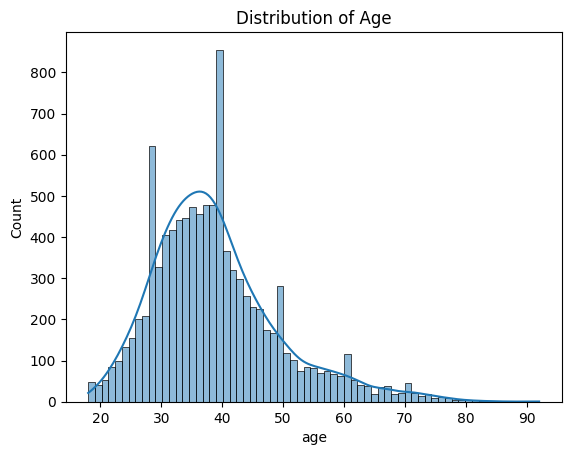

In [19]:
sns.histplot(data=data, x="age", kde=True).set(title="Distribution of Age")
plt.show()

In [20]:
data['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

Having thoroughly explored the numeric dependent variables, I next turned to the categorical variables. I began by creating bar charts and mosaic plots for a basic visual analysis. See below:

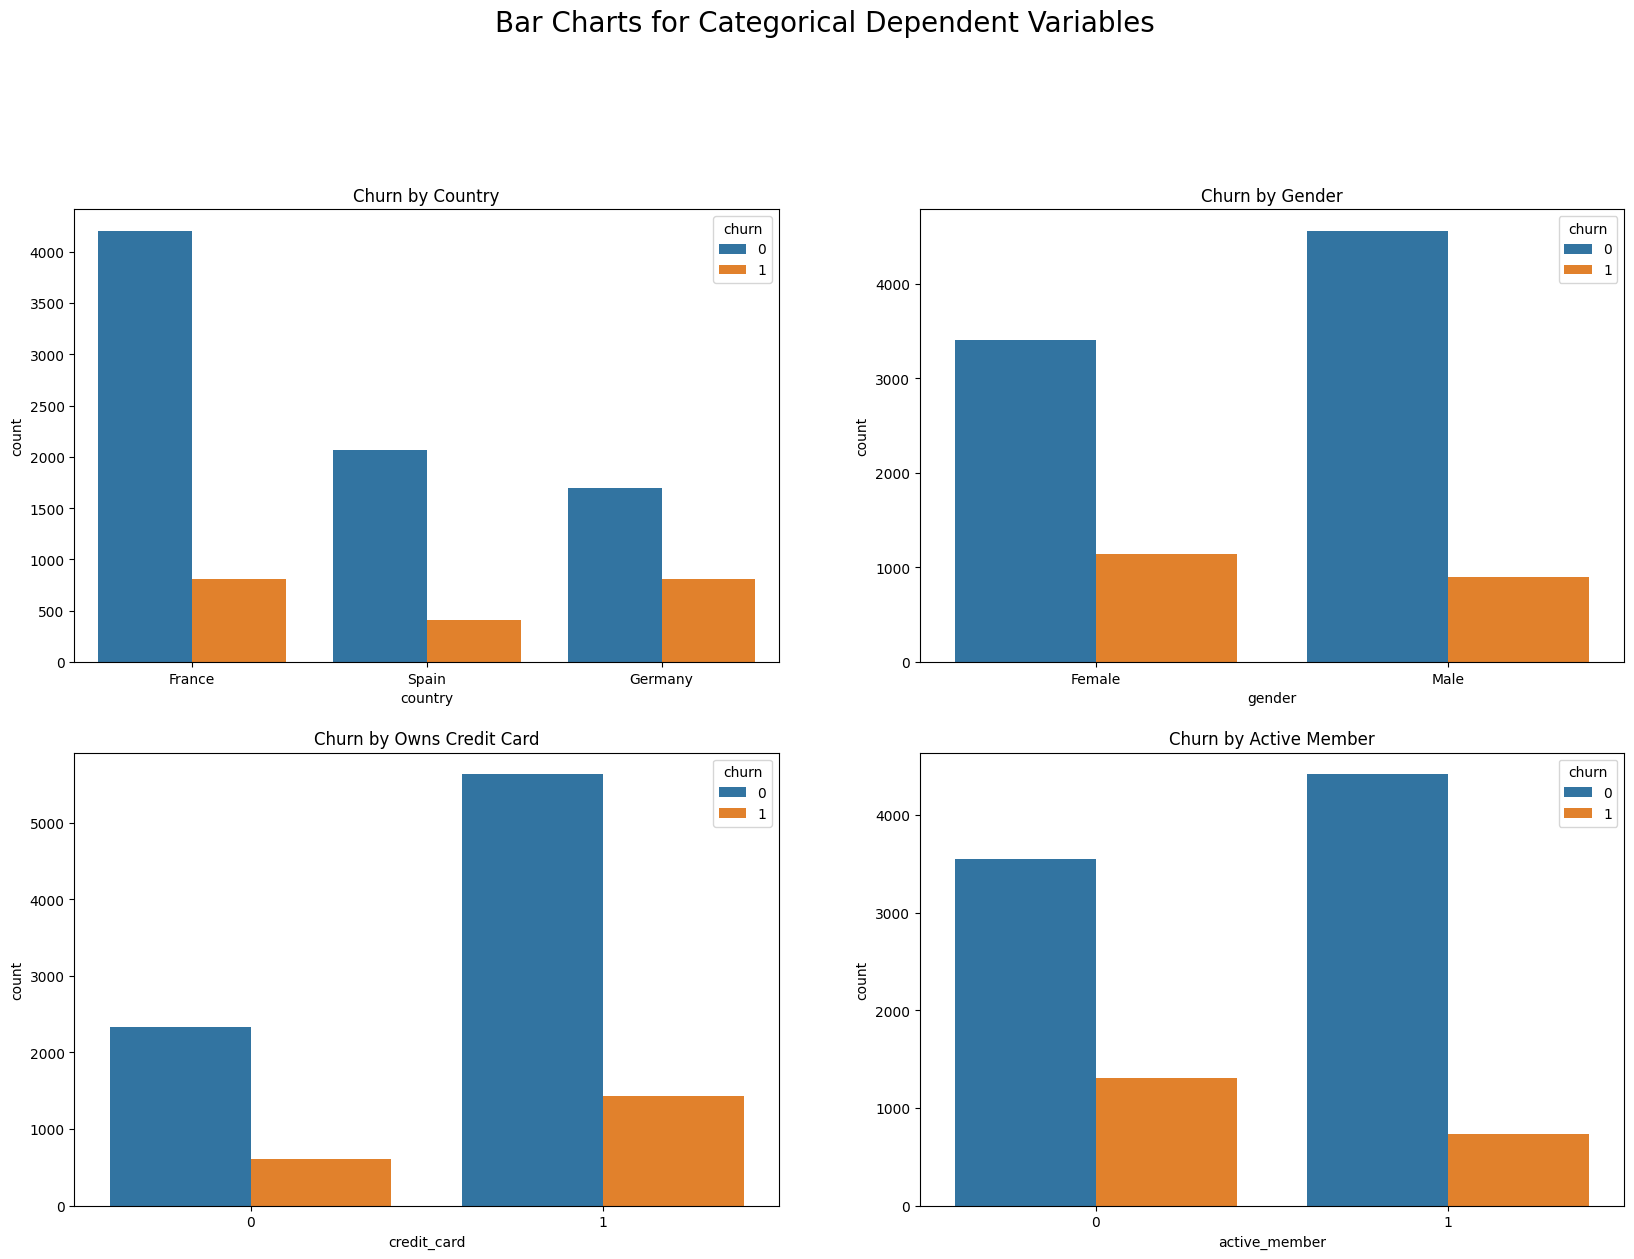

In [21]:
fig = plt.figure(figsize=(20,20))
fig.suptitle("Bar Charts for Categorical Dependent Variables", fontsize=20) 

ax1 = plt.subplot(3,2,1)
sns.countplot(data=data, x="country", hue="churn")

ax2 = plt.subplot(3,2,2)
sns.countplot(data=data, x="gender", hue="churn")

ax3 = plt.subplot(3,2,3)
sns.countplot(data=data, x="credit_card", hue="churn")

ax4 = plt.subplot(3,2,4)
sns.countplot(data=data, x="active_member", hue="churn")

ax1.title.set_text("Churn by Country")
ax2.title.set_text("Churn by Gender")
ax3.title.set_text("Churn by Owns Credit Card")
ax4.title.set_text("Churn by Active Member")

plt.show()

In [22]:
crosstable = pd.crosstab(data['churn'], data['gender'])
crosstable

gender,Female,Male
churn,,
0,3404,4559
1,1139,898


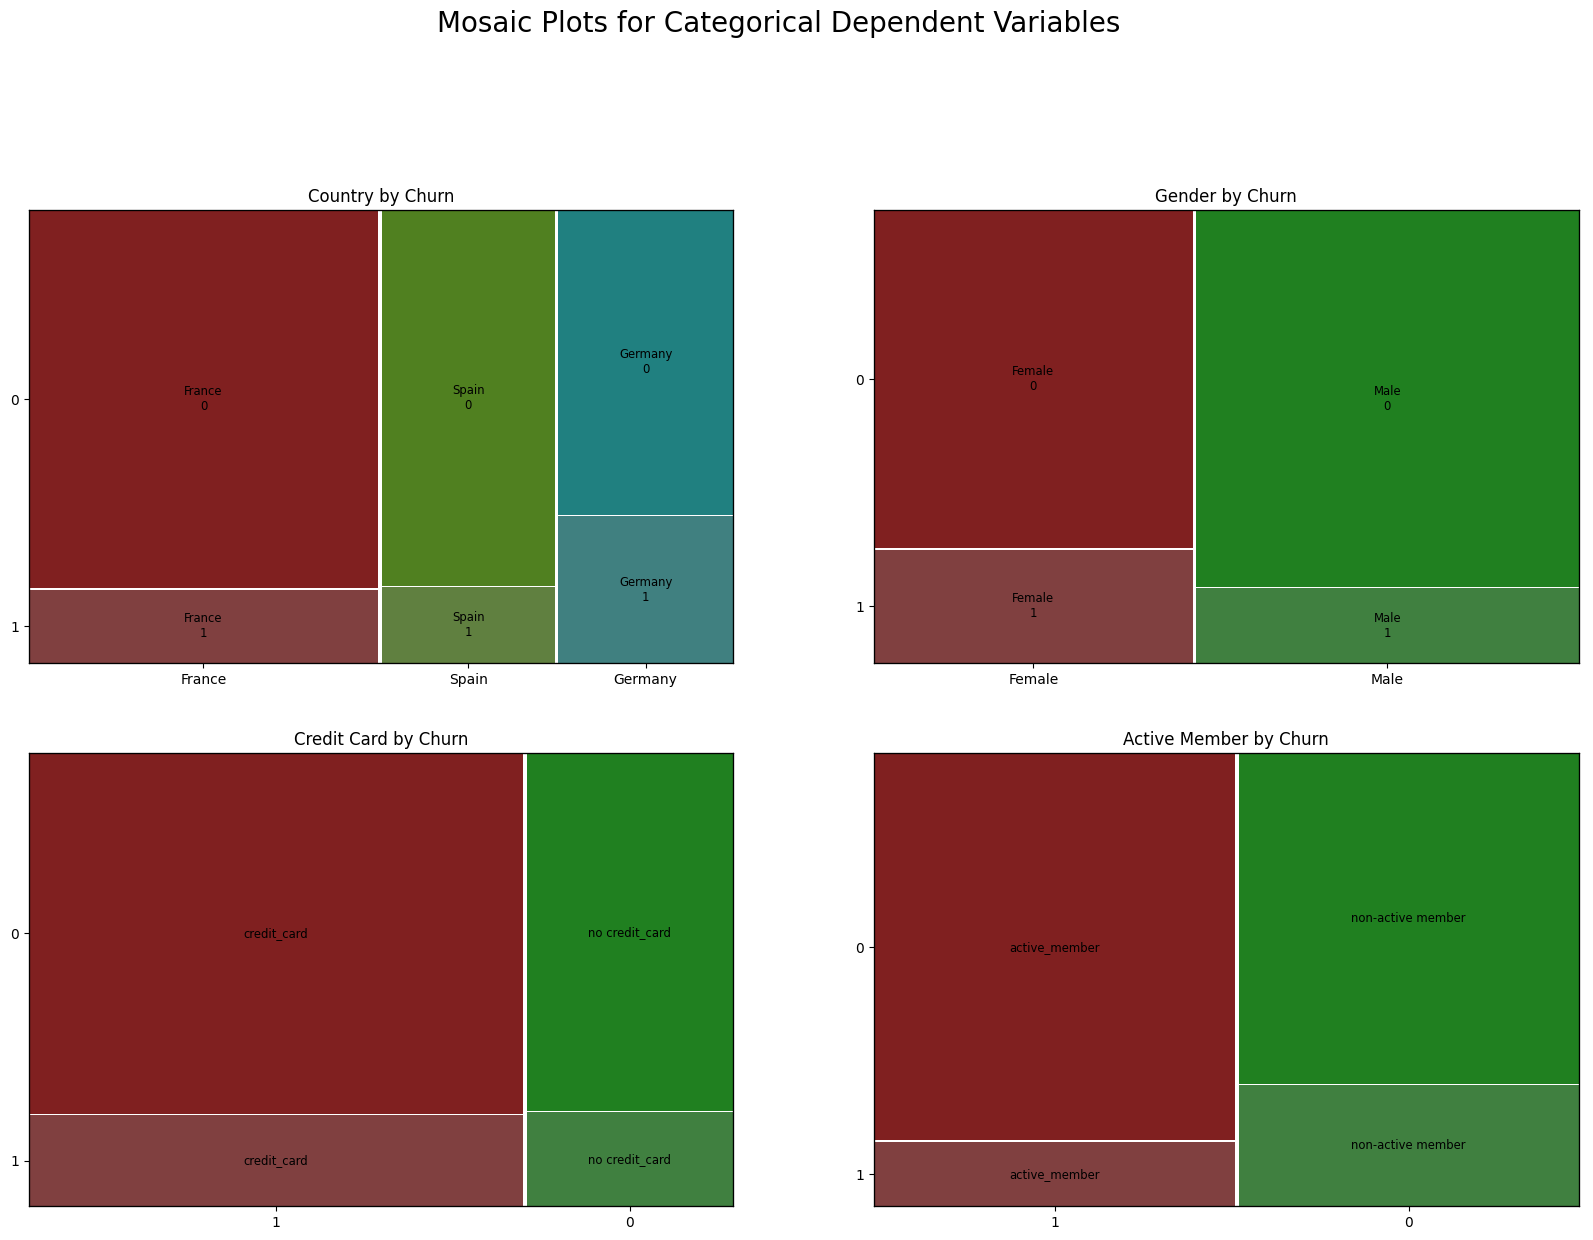

In [23]:
fig = plt.figure(figsize=(20,20))
fig.suptitle("Mosaic Plots for Categorical Dependent Variables", fontsize=20) 

ax1 = plt.subplot(3,2,1)

mosaic(data, ['country', 'churn'], title="Country by Churn",ax=ax1)
ax2 = plt.subplot(3,2,2)

mosaic(data, ['gender', 'churn'], title="Gender by Churn", ax=ax2)
ax3 = plt.subplot(3,2,3)
labelizer = lambda k: {('0','0'): 'no credit_card', ('0','1'): 'no credit_card', ('1','0'): 'credit_card',('1','1'): 'credit_card'}[k]
mosaic(data, ['credit_card', 'churn'], labelizer =labelizer, title="Credit Card by Churn", ax=ax3)
ax4 = plt.subplot(3,2,4)
labels = lambda k: {('0','0'): 'non-active member', ('0','1'): 'non-active member', ('1','0'): 'active_member',('1','1'): 'active_member'}[k]
mosaic(data, ['active_member', 'churn'], labelizer=labels, title="Active Member by Churn", ax=ax4)
plt.show()

These plots contained a few interesting findings, and indicate that the variables Country, Gender, and Active Member may all play a role in predicting whether or not a customer will churn. It appears that those from Germany are more likely to churn than those from France or Spain; Females appear more likely to churn than males; and Non-Active Members are more likely to churn than Active Members. Whether or not an individual owns a Credit Card does not appear to have a large relationship with Churn. 

Another interesting finding revealed by this plots is the fact that the dataset has a much higher proportion of data for customers who did not churn (0) than those who did churn (1). The official value counts for Churn are 7,963 customers who did not churn (0) and 2,037 who did churn (1). This unbalanced split has some implications for modeling which I will discuss later on. 

In [24]:
g_one_hot = pd.get_dummies(data['gender'])
g_one_hot.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [25]:
data = data.drop('gender',axis = 1)
# Join the encoded df
data = data.join(g_one_hot)
data.head()

,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Female,Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0


In [26]:
c_one_hot = pd.get_dummies(data['country'])
#c_one_hot.head()

In [27]:
data2 = data.drop('country',axis = 1)
data2 = data2.join(c_one_hot)
#data2.head()

In [28]:
data2['zero_balance'] = np.where(data2['balance'] == 0.0, 1, 0) #leave this for later on! 

In [29]:
#data2.head()

In [30]:
data2 = data2.drop('balance',axis = 1)

In [31]:
first_column = data2.pop('churn')
data2.insert(0, 'churn', first_column)

In [32]:
data2.head()

,churn,credit_score,age,tenure,products_number,credit_card,active_member,estimated_salary,Female,Male,France,Germany,Spain,zero_balance
0,1,619,42,2,1,1,1,101348.88,1,0,1,0,0,1
1,0,608,41,1,1,0,1,112542.58,1,0,0,0,1,0
2,1,502,42,8,3,1,0,113931.57,1,0,1,0,0,0
3,0,699,39,1,2,0,0,93826.63,1,0,1,0,0,1
4,0,850,43,2,1,1,1,79084.10,1,0,0,0,1,0


In [33]:
data2.dtypes

churn                 int64
credit_score          int64
age                   int64
tenure                int64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
Female                uint8
Male                  uint8
France                uint8
Germany               uint8
Spain                 uint8
zero_balance          int64
dtype: object

In [34]:
numeric_vars = data2[['churn', 'credit_score', 'age', 'tenure','products_number', 'estimated_salary']]

In [35]:
corr_matrix = numeric_vars.corr().round(2)
print(corr_matrix)

                  churn  credit_score   age  tenure  products_number  \
churn              1.00         -0.03  0.29   -0.01            -0.05   
credit_score      -0.03          1.00 -0.00    0.00             0.01   
age                0.29         -0.00  1.00   -0.01            -0.03   
tenure            -0.01          0.00 -0.01    1.00             0.01   
products_number   -0.05          0.01 -0.03    0.01             1.00   
estimated_salary   0.01         -0.00 -0.01    0.01             0.01   

                  estimated_salary  
churn                         0.01  
credit_score                 -0.00  
age                          -0.01  
tenure                        0.01  
products_number               0.01  
estimated_salary              1.00  


The last part of exploratory data analysis I conducted was creating a correlation matrix for the numeric variables. High correlation between predicting variables may indicate that multicollinearity is present in the dataset, which has implications for variable selection and model building. However, the correlation matrix revealed very low correlations between numeric variables, indicating that multicollinearity will likely not be a large issue for this dataset. See below:

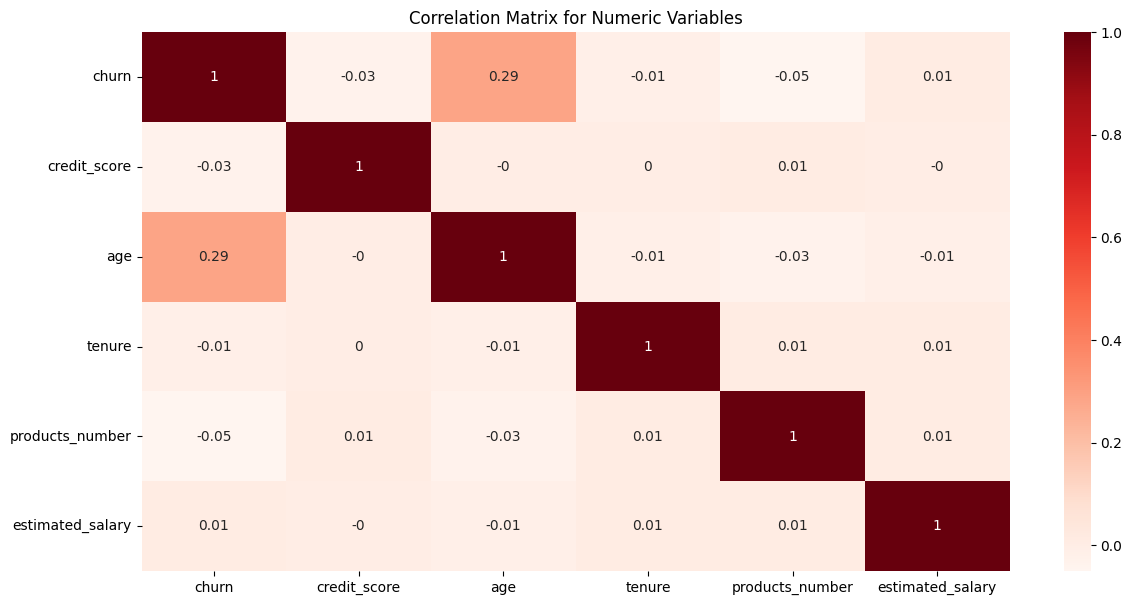

In [36]:
plt.figure(figsize = (14,7))
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title(label="Correlation Matrix for Numeric Variables")
plt.show()

Having completed the exploratory data analysis, I conducted some one-hot encoding for the relevant categorical variables, and split the data into an 80/20 train-test split. 

**Variable Selection**

I next turned to variable selection. While the correlation matrix revealed that multicollinearity may not be an issue for this dataset, variable selection can still aid by both removing irrelevant features (those with no predictive or explanatory power), and further by identifying the most important features. 

I decided to use Lasso for variable selection. Traditional Lasso optimizes the least squares problem with a L1 penalty. However, my response variable is binary; thus I must perform Logistic Lasso regression to perform variable selection (essentially, this means fitting a traditional Logistic Regression model but adding in an L1 penalty). The data was standardized and scaled prior to building the Logistic Lasso regression. I tuned the penalization parameter for the Logistic Lasso model via 10-fold cross-validation. Ultimately, the best regularization parameter was found to be 0.05. It should be noted that in sklearn's LogisticRegressionCV, the regularization parameter describes the inverse of regularization strength; thus [smaller values specificy stronger regularization](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html). 

Below is a plot showing each tested regularization parameter against the average accuracy score of that particular model (using a default classification threshold of 0.5 -- more on this later). 

In [37]:
data2.head()

,churn,credit_score,age,tenure,products_number,credit_card,active_member,estimated_salary,Female,Male,France,Germany,Spain,zero_balance
0,1,619,42,2,1,1,1,101348.88,1,0,1,0,0,1
1,0,608,41,1,1,0,1,112542.58,1,0,0,0,1,0
2,1,502,42,8,3,1,0,113931.57,1,0,1,0,0,0
3,0,699,39,1,2,0,0,93826.63,1,0,1,0,0,1
4,0,850,43,2,1,1,1,79084.10,1,0,0,0,1,0


In [38]:
features = data2.columns[1:14]
target = data2.columns[0]
X = data2[features].values
y = data2[target].values

In [39]:
print(X)

[[619.  42.   2. ...   0.   0.   1.]
 [608.  41.   1. ...   0.   1.   0.]
 [502.  42.   8. ...   0.   0.   0.]
 ...
 [709.  36.   7. ...   0.   0.   1.]
 [772.  42.   3. ...   1.   0.   0.]
 [792.  28.   4. ...   0.   0.   0.]]


In [40]:
print(y)

[1 0 1 ... 1 1 0]


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [42]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([6359, 1641]))

In [43]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([1604,  396]))

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
lasso_glm = LogisticRegressionCV(Cs = [0.001, 0.005, 0.0075, 0.01, .05, .075, .1, .5, .75, 1], cv=10, penalty='l1', solver="liblinear", random_state=2).fit(X_train_scaled, y_train)

In [46]:
lasso_glm.C_

array([0.05])

In [47]:
cs = lasso_glm.Cs_
print(cs)

[0.001  0.005  0.0075 0.01   0.05   0.075  0.1    0.5    0.75   1.    ]


In [48]:
scs = lasso_glm.scores_[1]
scs

array([[0.795  , 0.79375, 0.79625, 0.80125, 0.80625, 0.80625, 0.80625,
        0.80375, 0.80375, 0.80375],
       [0.795  , 0.80125, 0.80125, 0.81125, 0.81   , 0.81   , 0.81   ,
        0.8125 , 0.81125, 0.81125],
       [0.795  , 0.80625, 0.805  , 0.80875, 0.82   , 0.82125, 0.82   ,
        0.8175 , 0.8175 , 0.8175 ],
       [0.795  , 0.8025 , 0.8075 , 0.8075 , 0.80625, 0.805  , 0.80625,
        0.8025 , 0.8025 , 0.80125],
       [0.795  , 0.80125, 0.80375, 0.81   , 0.815  , 0.815  , 0.81625,
        0.815  , 0.815  , 0.815  ],
       [0.795  , 0.79625, 0.8025 , 0.80625, 0.81125, 0.81   , 0.81   ,
        0.80875, 0.80875, 0.80875],
       [0.795  , 0.79125, 0.795  , 0.80125, 0.80625, 0.80375, 0.80375,
        0.80375, 0.80375, 0.80375],
       [0.795  , 0.8    , 0.805  , 0.81   , 0.8075 , 0.80875, 0.8075 ,
        0.81   , 0.81   , 0.81   ],
       [0.795  , 0.795  , 0.79875, 0.80375, 0.80375, 0.80375, 0.8025 ,
        0.80125, 0.80125, 0.80125],
       [0.79375, 0.795  , 0.805  , 0.

In [49]:
scores = np.mean(scs, axis=0)
scores

array([0.794875, 0.79825 , 0.802   , 0.806625, 0.80975 , 0.809625,
       0.8095  , 0.8085  , 0.808375, 0.80825 ])

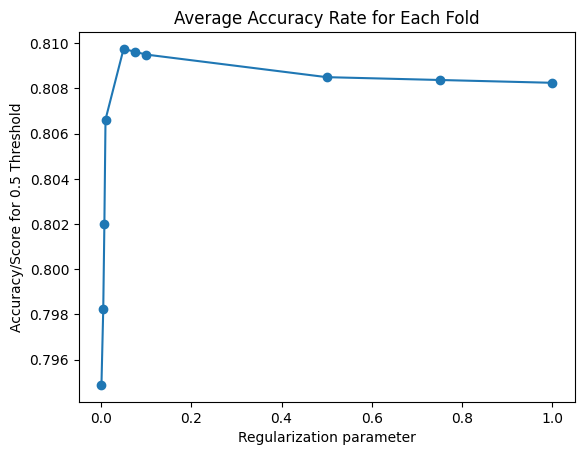

In [50]:
plt.plot(cs, scores, "-o") #Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.
plt.title("Average Accuracy Rate for Each Fold")
plt.xlabel("Regularization parameter")
plt.ylabel('Accuracy/Score for 0.5 Threshold')
plt.show()

In [51]:
lasso_glm.coef_

array([[-0.01814378,  0.72043614, -0.03486288, -0.04349273, -0.0227542 ,
        -0.50621947,  0.01562966,  0.15976542, -0.07163175, -0.00107001,
         0.27854284,  0.        , -0.19793599]])

Below is a plot displaying the magnitude of the coefficients selected for the best regularization parameter 0.05. We can see that Logistic Lasso only removed two variables - the one hot encoded variables for France and Spain. Additionally, the coefficients with the largest magnitude correspond to the variables for Age, Germany, Female, Active Member, and Zero Balance. The signs of these coefficients indicate that invidiuals who are older, live in Germany, or are Female are more likely to Churn, while those who are Active Members, have a Zero Balance account and Male, are less likely to Churn. 

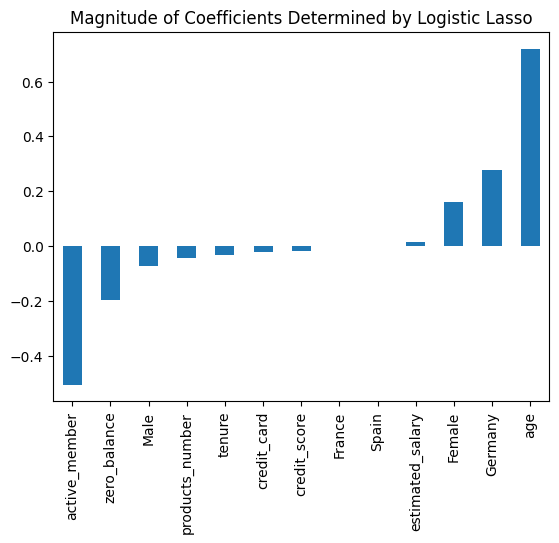

In [52]:
pd.Series(lasso_glm.coef_[0], features).sort_values(ascending = True).plot(kind = "bar")
plt.title("Magnitude of Coefficients Determined by Logistic Lasso")
plt.show()

With this information in hand, I dropped the variables France, Spain, and Male from the dataset (while the variable Male was not removed by Lasso, the information captured by that variable was redundant; hence it was only necessary to keep in either Female or Male for further modeling). 

**Modeling**

*Logistic Regression*

The first model I decided to build was a standard Logistic Regression. Logistic regression lends itself well to this dataset in two ways: it can be easily used for binary classification/prediction, and it is also very interpretable (meaning we can extract information about which attributes have the most predictive power). This is especially important for business-related data, as oftentimes one needs to explain the results from a model to non-technical stakeholders. 

As mentioned above, I dropped the variables France, Spain, and Male from the dataset prior to fitting the Logistic Regression model. I also fed the model the orginal unscaled/unstandardized data, both to aid in interpretation of the model, but also because standardizing/scaling is unnecessary for Logistic Regression.

In [53]:
#13 features: remove : 9, 10, 12 (one-indexed, correct for zero based)

In [54]:
print(X_train)
X_train.shape

[[543.  30.   4. ...   0.   0.   0.]
 [668.  46.   0. ...   0.   0.   1.]
 [767.  35.   6. ...   1.   0.   0.]
 ...
 [686.  34.   3. ...   0.   0.   0.]
 [637.  41.   2. ...   0.   0.   1.]
 [614.  30.   3. ...   1.   0.   0.]]


(8000, 13)

In [55]:
X_train_mod = np.delete(X_train, [8,9,11], axis=1)

In [56]:
X_train_mod.shape

(8000, 10)

In [57]:
print(X_train_mod)

[[543.  30.   4. ...   0.   0.   0.]
 [668.  46.   0. ...   0.   0.   1.]
 [767.  35.   6. ...   1.   1.   0.]
 ...
 [686.  34.   3. ...   1.   0.   0.]
 [637.  41.   2. ...   0.   0.   1.]
 [614.  30.   3. ...   1.   1.   0.]]


In [58]:
X_test_mod = np.delete(X_test, [8,9,11], axis=1)

In [59]:
X_test_mod.shape #dropped irrelevant vars, but did not scale

(2000, 10)

In [60]:
log = LogisticRegression(random_state=0).fit(X_train_mod, y_train)

In [61]:
log.coef_

array([[-4.56200491e-03,  4.35590335e-02, -1.56321220e-03,
        -7.11305216e-04, -1.99925624e-04, -1.37854543e-03,
        -1.24710672e-06,  8.20365203e-04,  1.17576203e-03,
        -1.12528654e-03]])

In [62]:
probs = [np.exp(x)/(1 + np.exp(x)) for x in log.coef_[0]]
probs

[0.49885950075056334,
 0.51088803685534,
 0.49960919703076245,
 0.499822173703584,
 0.4999500185940424,
 0.4996553636976234,
 0.49999968822331914,
 0.5002050912891316,
 0.5002939404725663,
 0.49971867839343903]

In [63]:
log.score(X_train_mod, y_train)

0.786375

In [64]:
log.score(X_test_mod, y_test) #accuracy for test data

0.7965

In [65]:
#Citation: https://stackoverflow.com/questions/28716241/controlling-the-threshold-in-logistic-regression-in-scikit-learn

The fitted Logistic Regression model displayed medicore classification performance. The accuracy score for the test data was 0.7965 (or in other words 79.65% of the test data points were correctly classified). The ROC Curve, AUC, and Precision-Recall Curve displayed fair/poor performance as well. Perfect AUC and AP scores are 1.0, so scores of 0.68 and 0.33 do not reflect a particularly strong model. Plots displaying these metrics may be found below:

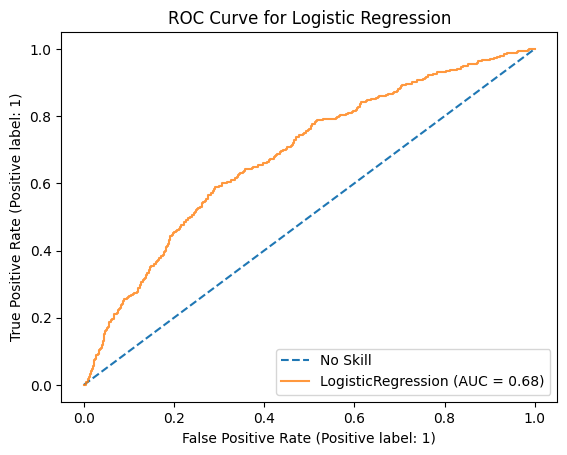

In [66]:
ax = plt.gca()
plt.plot([0, 1], [0, 1], linestyle="--", label='No Skill')
log_disp = RocCurveDisplay.from_estimator(log, X_test_mod, y_test, ax=ax, alpha=0.8)
plt.title("ROC Curve for Logistic Regression")
plt.show()

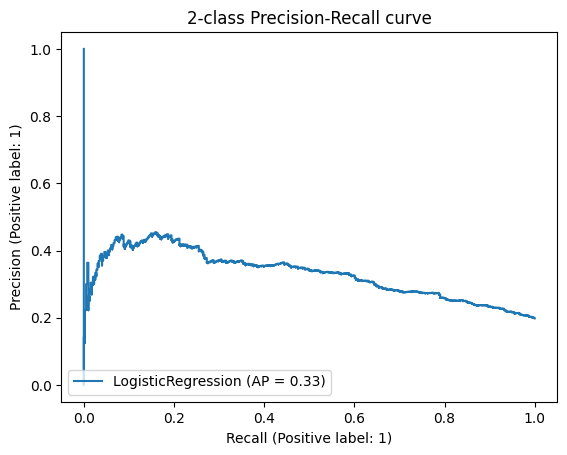

In [67]:
probs_y=log.predict_proba(X_test_mod) 

display = PrecisionRecallDisplay.from_predictions(y_test, probs_y[:,1], name="LogisticRegression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [68]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

#info on interpretation of PRCs

In [69]:
pred_proba = log.predict_proba(X_test_mod)[:,1]
#print(pred_proba)
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = np.where(pred_proba > i, 1, 0)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print('Accuracy/Score is {}'.format(test_accuracy))
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred, zero_division=1))


******** For i = 0.05 ******
Accuracy/Score is 0.1995
[[   3 1601]
 [   0  396]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1604
           1       0.20      1.00      0.33       396

    accuracy                           0.20      2000
   macro avg       0.60      0.50      0.17      2000
weighted avg       0.84      0.20      0.07      2000


******** For i = 0.1 ******
Accuracy/Score is 0.291
[[ 200 1404]
 [  14  382]]
              precision    recall  f1-score   support

           0       0.93      0.12      0.22      1604
           1       0.21      0.96      0.35       396

    accuracy                           0.29      2000
   macro avg       0.57      0.54      0.29      2000
weighted avg       0.79      0.29      0.25      2000


******** For i = 0.15 ******
Accuracy/Score is 0.446
[[ 552 1052]
 [  56  340]]
              precision    recall  f1-score   support

           0       0.91      0.34      0.50     

In addition to evaluating the model based off the above metrics, I decided to also more closely examine the Confusion Matrix and corresponding Precision/Recall/F1-Scores of the Logistic Regression model for different thresholds. The above model used a default threshold of 0.5 which is the standard threshold for Logistic Regression models, however, sometimes better predictive performance can be achieved using a different threshold. Below is a summary of results for the test data for the thresholds 0.1, 0.25, 0.3, 0.5, 0.6. During my actual model building I tested even more thresholds, however, I felt that these 5 provided an adequate representation of the varying results one can get by altering threshold.

In [70]:
threshold_list = [0.1,0.25,0.3,0.5,0.6]
for i in threshold_list:
    print ('\n******** Logistic Regression model where threshold = {} ******'.format(i))
    y_test_pred = np.where(pred_proba > i, 1, 0)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print('Accuracy/Score is {}'.format(test_accuracy))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred, zero_division=1))


******** Logistic Regression model where threshold = 0.1 ******
Accuracy/Score is 0.291
Confusion Matrix:
[[ 200 1404]
 [  14  382]]
              precision    recall  f1-score   support

           0       0.93      0.12      0.22      1604
           1       0.21      0.96      0.35       396

    accuracy                           0.29      2000
   macro avg       0.57      0.54      0.29      2000
weighted avg       0.79      0.29      0.25      2000


******** Logistic Regression model where threshold = 0.25 ******
Accuracy/Score is 0.7045
Confusion Matrix:
[[1203  401]
 [ 190  206]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1604
           1       0.34      0.52      0.41       396

    accuracy                           0.70      2000
   macro avg       0.60      0.64      0.61      2000
weighted avg       0.76      0.70      0.73      2000


******** Logistic Regression model where threshold = 0.3 ******
Accuracy/Sc

First, I'll highlight the results from the logistic regression model where the threshold was 0.5. Again, this is the standard threshold that was discussed above. We can see that the accuracy score for this model is 0.7965. However, closer examination of the Confusion Matrix reveals that the recall score for customers who churned is just 4% (or in other words, only 16 out of 396 customers who churned were correctly identified). This is pretty abysmal performance, and is a sign that the model would be almost entirely useless to a business who wanted to predict customer churn. This result also emphasizes the importance of not just relying on a single metric when evaluating classification models, but evaluating results holistically. I'll also add that because the dataset was unbalanced to begin with (roughly 20% of the customers in the dataset represented customers who churned, and 80% didn't), this means that looking at metrics such as Accuracy on their own can be very deceptive in terms of evaluating model strength. While I had initially planned to choose a threshold for the logistic regression model via cross-validation optimizing for Accuracy, these results revealed that choosing a threshold that way would be antithetical to the ultimate goal of predicting customer churn.

Interestingly, however, if were to lower the classification threshold, it appears that we can get a more balanced model that doesn't sacrifice too much accuracy. For example, for a threshold of 0.25, the recall for customers who churned is 52% (a significant improvement over 4%); the overall accuracy is 70.45%. So even though the overall acuraccy has decreased by ~9%, this is a model that may actually provide more value to a business than the model with the 0.5 threshold. 

Further solidifying this idea is the plot below showing the differeing Precision/Recall scores as the threshold for the logistic regression model changes. This again reinforces the notion that for this particular model, a lower threshold may provide more value in identifying customers who churn.

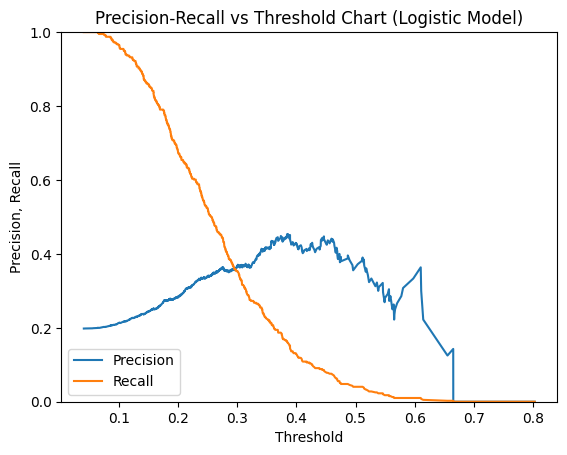

In [71]:
#pred_y=log.predict(X_test_mod) 

probs_y=log.predict_proba(X_test_mod) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first 
  #column of 
  #array) vs 1 (2nd column in array)

precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 
1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart (Logistic Model)")
plt.plot(thresholds, precision[: -1], label="Precision")
plt.plot(thresholds, recall[: -1], label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()

Ultimately, selecting the best threshold for this model would come down to the needs and costs of that business. In the real world, a business could assign actual costs related to customer churn which would then be used in conjunction with model building and selection. For example, costs could be assigned to incorrectly identifying a loyal customer as one who'd be likely to churn, or and costs for not identifying a customer who will leave (where presumably intervention could have prevented churn). All of this information could be inrcorporated into choosing the final model.

In [72]:
#based off plot above, a threshold around 0.3 may produce the best prediction performance

*Random Forest*

The next classification model I built was a Random Forest. I was hopeful that the Random Forest would display better predictive performance than the Logistic Regression, as Random Forests are known for being particularly robust and having strong predictive prowess. This did indeed prove to be the case. See below for the ROC/AUC, Precision-Recall Curve, and Confusion Matrix for the final Random Forest model. The final random forest was built using 100 trees, and was fit to the same variables as the Logistic Regression model (those chosen by Lasso). 

In [73]:
# error_rates = [] #varying number of trees and number of features did not appear to significantly impact RF performance

# num_trees = range(50,120)
# for i in num_trees:
#     rf = RandomForestClassifier(n_estimators = i, random_state=0)
#     rf = rf.fit(X_train_mod, y_train)
#     rf_pred = rf.predict(X_test_mod)
#     rf_accuracy = accuracy_score(y_test, rf_pred)
#     error_rates.append(rf_accuracy)
    
# print(error_rates)

In [74]:
# plt.plot(num_trees, error_rates, '-o', label="RF Error Rates") 
# plt.title("Accuracy Against Number of Trees")
# plt.xlabel("RF Number of Trees")
# plt.ylabel('Accuracy')
# plt.grid()
# plt.legend(loc="upper right")

In [75]:
rf = RandomForestClassifier(random_state=0).fit(X_train_mod, y_train)

In [76]:
rf_preds = rf.predict(X_test_mod)

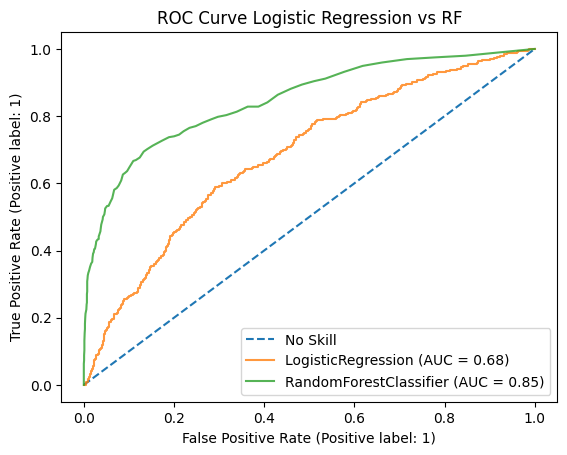

In [77]:
ax = plt.gca()
plt.plot([0, 1], [0, 1], linestyle="--", label='No Skill')
log_disp.plot(ax=ax, alpha=0.8)
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test_mod, y_test, ax=ax, alpha=0.8)
plt.title("ROC Curve Logistic Regression vs RF")
plt.show()

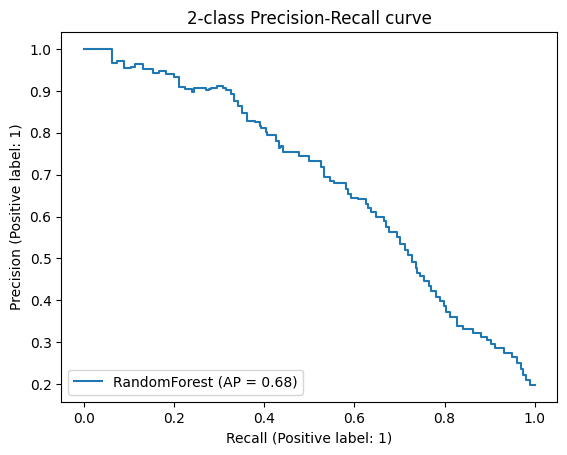

In [78]:
display = PrecisionRecallDisplay.from_estimator(
    rf, X_test_mod, y_test, name="RandomForest"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [79]:
rf_accuracy = accuracy_score(y_test, rf_preds)
print("Random Forest Results")
print('Accuracy/Score is {}'.format(rf_accuracy))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds, zero_division=1))

Random Forest Results
Accuracy/Score is 0.866
Confusion Matrix:
[[1537   67]
 [ 201  195]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1604
           1       0.74      0.49      0.59       396

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



The above plots and output clearly show that the Random Forest is superior to the Logistic Regression model in a multitude of ways. First, the AUC and AP scores are significantly improved. Second, the overall Accuracy of the model is better at 86.6%, but perhaps even more importantly, the recall for churn individuals is now 49%. Thus, the Random Forest model was more accurate than the Logistic Regression model on every front. 

Additionally, I extracted the feature importances from the Random Forest model and identified those that were considered by the Random Forest model to be the "most important". A list of those features identified as most important are below: 

   + Credit Score
   + Age
   + Products Number
   + Estimated Salary
   
Interestingly, these features don't overlap much with the top 4 features (magnitude-wise) identified by Lasso (with the exception of the Age variable). Perhaps this is not surprising, however. It should be noted that the most important features identified by the Random Forest are all numeric. It could be the case that these variables were identified as most important because these features allowed the Random Forest the most flexibility in terms of splitting out different groups. I will discuss this further in the Evaluation and Final Results section.

In [80]:
rf.feature_importances_

array([0.18330255, 0.26450183, 0.09911398, 0.13126349, 0.02131865,
       0.04313341, 0.19025361, 0.02088831, 0.02481393, 0.02141024])

In [81]:
#data2.columns.values.tolist()

In [82]:
feature_names = [
 'credit_score',
 'age',
 'tenure',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary',
 'Female',
 'Germany',
 'zero_balance']

feature_names = np.array(feature_names)
print(feature_names)

['credit_score' 'age' 'tenure' 'products_number' 'credit_card'
 'active_member' 'estimated_salary' 'Female' 'Germany' 'zero_balance']


In [83]:
importances = rf.feature_importances_
print(importances)
important_names = feature_names[importances > np.mean(importances)]
print(important_names)

[0.18330255 0.26450183 0.09911398 0.13126349 0.02131865 0.04313341
 0.19025361 0.02088831 0.02481393 0.02141024]
['credit_score' 'age' 'products_number' 'estimated_salary']


In [84]:
#https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f#:~:text=The%20more%20a%20feature%20decreases,final%20importance%20of%20the%20variable.

*Refitting of Models*

Before moving on to additional model building, I experimented with some model refitting for the Logistic Regression and Random Forest models. Given that the Random Forest had identified a smaller subset of variables than Lasso, I decided to re-fit the Logistic Regression and Random Forest using the Random Forest "most important" features (credit_score, age, products_number, estimated_salary) to see whether this would have a postive impact on either model. Ultimately, however, this did not improve performance for either model -- both still achieved best performance when fit to the Lasso chosen variables. Given the size of the dataset, and the fact that multicollinearity was not detected during the exploratory data analysis phase, this is perhaps not a surprising result. Still, it provided confirmation that Lasso had identified a solid group of variables to use for model fit.

In [85]:
X_train_mod2 = np.delete(X_train_mod, [2,4,5,7,8,9], axis=1) #delete 2, 4, 5, 7,8,9 (0 indexed)

In [86]:
#print(X_train_mod2)

In [87]:
X_test_mod2 = np.delete(X_test_mod, [2,4,5,7,8,9], axis=1)

In [88]:
#print(X_test_mod2)

In [89]:
rf2 = RandomForestClassifier(random_state=0).fit(X_train_mod2, y_train)

In [90]:
rf2_preds = rf2.predict(X_test_mod2) #refitting RF and Logistic Reg to reduced data did not improve performance

In [91]:
rf_accuracy = accuracy_score(y_test, rf2_preds)
print('Accuracy/Score is {}'.format(rf_accuracy))
print(confusion_matrix(y_test, rf2_preds))
print(classification_report(y_test, rf2_preds, zero_division=1))

Accuracy/Score is 0.8305
[[1491  113]
 [ 226  170]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1604
           1       0.60      0.43      0.50       396

    accuracy                           0.83      2000
   macro avg       0.73      0.68      0.70      2000
weighted avg       0.82      0.83      0.82      2000



In [92]:
log2 = LogisticRegression(random_state=0).fit(X_train_mod2, y_train)

In [93]:
log2.score(X_test_mod2, y_test)

0.7965

In [94]:
rf3 = RandomForestClassifier(random_state=0).fit(X_train, y_train)

In [95]:
rf3_preds = rf3.predict(X_test)

In [96]:
rf_accuracy = accuracy_score(y_test, rf3_preds) #RF fit to vars chosen by Lasso still performs the best
print('Accuracy/Score is {}'.format(rf_accuracy))
print(confusion_matrix(y_test, rf3_preds))
print(classification_report(y_test, rf3_preds, zero_division=1))

Accuracy/Score is 0.8615
[[1542   62]
 [ 215  181]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1604
           1       0.74      0.46      0.57       396

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [97]:
features_names = data2.columns[1:14]

importances = rf3.feature_importances_
print(importances)
important_names = features_names[importances > np.mean(importances)]
print(important_names)

[0.17980292 0.26298776 0.10306085 0.12958017 0.02150162 0.04156227
 0.18390064 0.00854292 0.00961405 0.01019423 0.0187824  0.00941456
 0.02105561]
Index(['credit_score', 'age', 'tenure', 'products_number', 'estimated_salary'], dtype='object')


*KNN Classifier*

The next model I built was a k-nearest neighbors classifier. 

In [98]:
#distance-based algorithm, so requires scaling

In [99]:
scaler = StandardScaler()
X_train_mod_sc= scaler.fit_transform(X_train_mod)
X_test_mod_sc = scaler.transform(X_test_mod)

In [100]:
ks = range(1, 40)
scores = []
recalls = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_mod_sc, y_train)
    preds = knn.predict(X_test_mod_sc)
    accuracy = knn.score(X_test_mod_sc, y_test)
    recall = classification_report(y_test, preds, zero_division=1, output_dict=True)['1']['recall']
    scores.append(accuracy)
    recalls.append(recall)

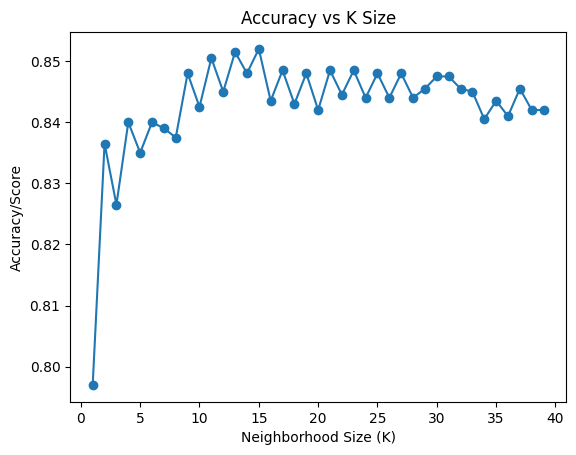

In [101]:
plt.plot(ks, scores, "-o")
plt.title("Accuracy vs K Size")
plt.xlabel("Neighborhood Size (K)")
plt.ylabel('Accuracy/Score')
plt.show()

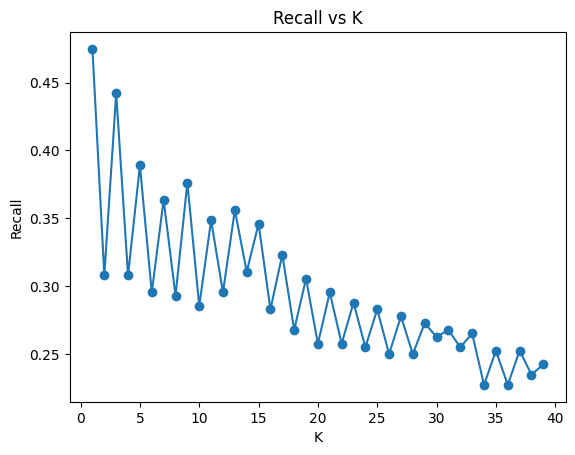

In [102]:
plt.plot(ks, recalls, "-o") 
plt.title("Recall vs K")
plt.xlabel("K")
plt.ylabel('Recall')
plt.show()

In [103]:
knn = KNeighborsClassifier(n_neighbors=15).fit(X_train_mod_sc, y_train) #best accuracy at k=15; best recall for k=1

In [104]:
knn.score(X_test_mod_sc, y_test)

0.852

In [105]:
knn_preds = knn.predict(X_test_mod_sc)

In [106]:
knn_accuracy = accuracy_score(y_test, knn_preds) #RF fit to vars chosen by Lasso still performs the best
print("KNN Results when k=15")
print('Accuracy/Score is {}'.format(knn_accuracy))
print(confusion_matrix(y_test, knn_preds))
print(classification_report(y_test, knn_preds, zero_division=1))

KNN Results when k=15
Accuracy/Score is 0.852
[[1567   37]
 [ 259  137]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1604
           1       0.79      0.35      0.48       396

    accuracy                           0.85      2000
   macro avg       0.82      0.66      0.70      2000
weighted avg       0.84      0.85      0.83      2000



In [107]:
knn2 = KNeighborsClassifier(n_neighbors=1).fit(X_train_mod_sc, y_train)

In [108]:
knn2.score(X_test_mod_sc, y_test)

0.797

In [109]:
knn2_preds = knn2.predict(X_test_mod_sc)

In [110]:
knn2_accuracy = accuracy_score(y_test, knn2_preds) #RF fit to vars chosen by Lasso still performs the best
print("KNN Results when k=1")
print('Accuracy/Score is {}'.format(knn2_accuracy))
print(confusion_matrix(y_test, knn2_preds))
print(classification_report(y_test, knn2_preds, zero_division=1))

KNN Results when k=1
Accuracy/Score is 0.797
[[1406  198]
 [ 208  188]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1604
           1       0.49      0.47      0.48       396

    accuracy                           0.80      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.80      0.80      0.80      2000



In [111]:
#classification_report(y_test, knn_preds, zero_division=1, output_dict=True)['1']['recall']

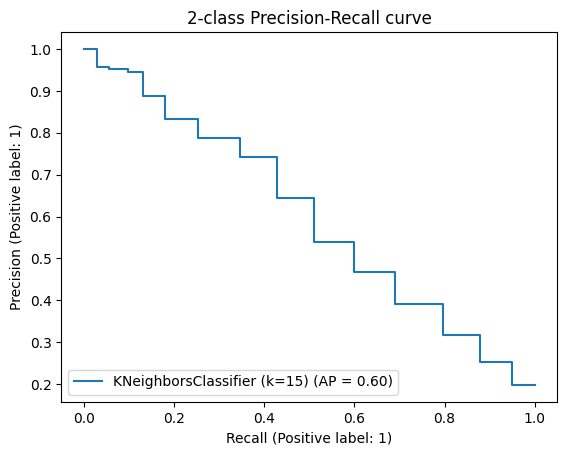

In [112]:
display = PrecisionRecallDisplay.from_estimator(
    knn, X_test_mod_sc, y_test, name="KNeighborsClassifier (k=15)"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

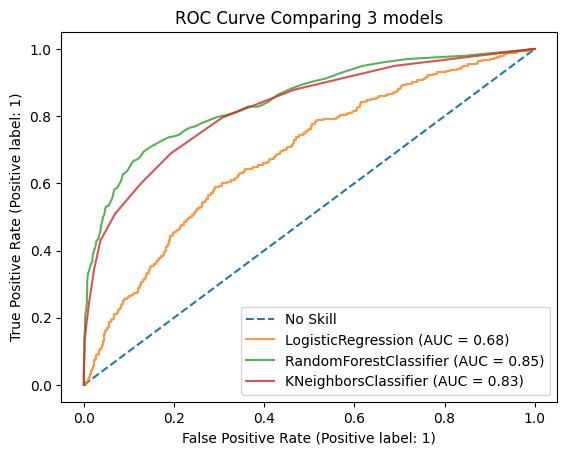

In [113]:
ax = plt.gca()
plt.plot([0, 1], [0, 1], linestyle="--", label='No Skill')
log_disp.plot(ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
knn_disp = RocCurveDisplay.from_estimator(knn, X_test_mod_sc, y_test, ax=ax, alpha=0.8)
plt.title("ROC Curve Comparing 3 models")
plt.show()

*Support Vector Machine*

In [114]:
svm = SVC(kernel='rbf', random_state=0).fit(X_train_mod_sc, y_train)

In [115]:
svm.score(X_test_mod_sc, y_test)

0.869

In [116]:
svm_preds = svm.predict(X_test_mod_sc)

In [117]:
svm_accuracy = accuracy_score(y_test, svm_preds) #RF fit to vars chosen by Lasso still performs the best
print("SVM Results")
print('Accuracy/Score is {}'.format(svm_accuracy))
print(confusion_matrix(y_test, svm_preds))
print(classification_report(y_test, svm_preds, zero_division=1))

SVM Results
Accuracy/Score is 0.869
[[1570   34]
 [ 228  168]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1604
           1       0.83      0.42      0.56       396

    accuracy                           0.87      2000
   macro avg       0.85      0.70      0.74      2000
weighted avg       0.86      0.87      0.85      2000



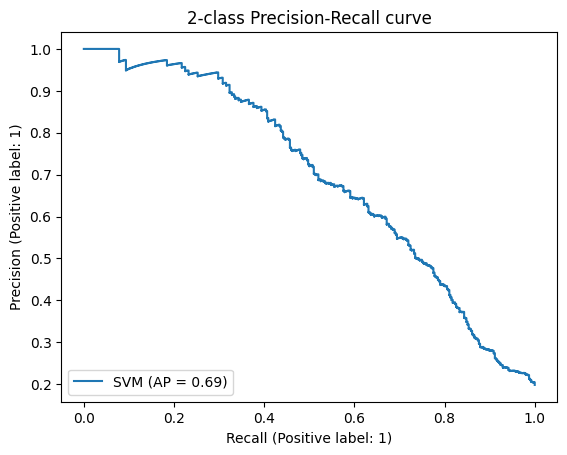

In [118]:
display = PrecisionRecallDisplay.from_estimator(
    svm, X_test_mod_sc, y_test, name="SVM"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

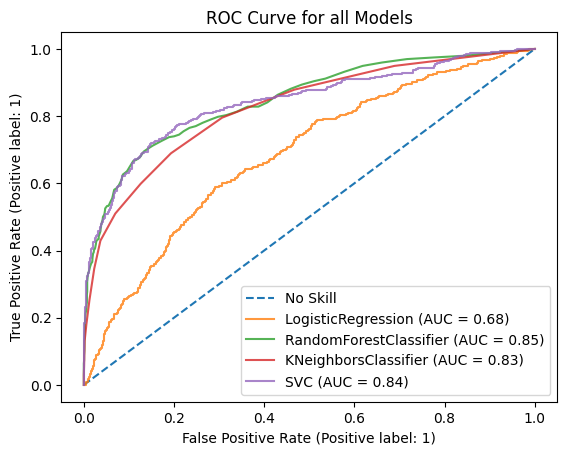

In [119]:
ax = plt.gca()
plt.plot([0, 1], [0, 1], linestyle="--", label='No Skill')
log_disp.plot(ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
knn_disp.plot(ax=ax, alpha=0.8)
svm_disp = RocCurveDisplay.from_estimator(svm, X_test_mod_sc, y_test, ax=ax, alpha=0.8)
plt.title("ROC Curve for all Models")
plt.show()

## Evaluation and Final Results {-}

In [120]:
#mainly discussion of above; create chart comparing/contrasting models
#discuss which model best for classification
#discuss interpretation of variables

## Conclusion {-}

In [121]:
#write about what was accomplished/learned
#suggestions for improvement: additional variables, segmentation of models, additional models to try

## Citations {-}

+ "Bank Customer Churn", [https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset)
+ "The Value of Keeping the Right Customers", Amy Gallo, [https://hbr.org/2014/10/the-value-of-keeping-the-right-customers](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers)